# **Project: Multitask Learning for Geometric Shape Classification and Counting**

## 1. Overview

In this project, you will design, implement, and evaluate a **multitask neural network** that performs **two tasks simultaneously**:

1. **Classification** – identify which pair of geometric shape types appears in a 28×28 binary image (135 possible configurations).
2. **Regression** – predict how many shapes of each type are present (6 regression targets).

This project focuses on **multi-task learning**, i.e., using one shared model to learn several related tasks at once. You will compare how adding an auxiliary task affects performance and training dynamics.

---

## 2. Dataset

You will use the **Geometric Shape Numbers (GSN)** dataset:

```bash
!wget https://github.com/marcin119a/data/raw/refs/heads/main/data_gsn.zip
!unzip data_gsn.zip &> /dev/null
!rm data_gsn.zip
```

This will create a directory `data/` containing:

* **10,000 images** (28×28x1, grayscale)
* **labels.csv** – counts of each of six shape types per image

Each image contains exactly **two types** of geometric figures (out of six) and **10 shapes total**.

**Shape classes:**

| Index | Shape type     |
| ----: | -------------- |
|     0 | square         |
|     1 | circle         |
|     2 | triangle up    |
|     3 | triangle right |
|     4 | triangle down  |
|     5 | triangle left  |

Example row from `labels.csv`:

```
name,squares,circles,up,right,down,left
img_00000.png,0,0,0,4,0,6
```

Here, the image contains **4 right-pointing triangles** and **6 left-pointing triangles**.

**Split:**

* Training: first 9,000 samples
* Validation: last 1,000 samples

Examples:
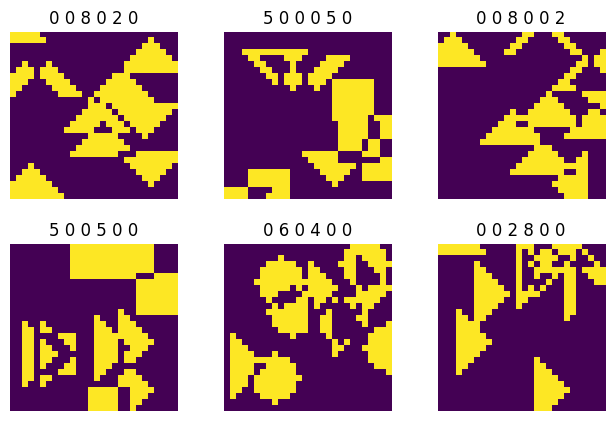

---

## 3. Tasks and objectives

You must design a **multitask deep learning system** that:

1. **Classifies** each image into one of **135 possible configurations**, representing:

   * which **two shape classes** appear, and
   * how their counts (1–9) sum to 10.

   → Example: "3 circles + 7 squares" is one configuration class.

2. **Regresses** the number of shapes of each type (a 6-dimensional real-valued output).

3. Combines both objectives in a **joint loss** function (Hint: losses are implemented in PyTorch):


$$ Loss = \text{NLLLoss(classification)} + \lambda_{\text{cnt}} \cdot \text{SmoothL1Loss(regression)}
$$

---

## 4. Model requirements

### Architecture constraints

You must use **exactly this feature extractor (backbone)**:

```python
nn.Sequential(
    nn.Conv2d(1, 8, 3, stride=1, padding=1), nn.ReLU(),
    nn.Conv2d(8, 16, 3, stride=1, padding=1), nn.ReLU(),
    nn.Conv2d(16, 32, 3, stride=1, padding=1), nn.ReLU(),
    nn.Conv2d(32, 64, 3, stride=1, padding=1), nn.ReLU(),
    nn.Flatten(start_dim=1),
    nn.Linear(64 * 28 * 28, 256), nn.ReLU()
)
```

Then add **two separate heads**:

* `head_cls`: outputs log-probabilities for 135 classes
* `head_cnt`: outputs 6 regression values (counts)

The model must return two outputs: `(log_probs, counts)`.

You may add dropout or batch normalization inside the heads, **but you must not modify the backbone**.

---

## 5. Training setup

* Optimizer: **Adam**, learning rate = 1e-3
* Epochs: up to **100** (use **early stopping**)
* Batch sizes: **64** (train), **1000** (validation)
* Device: GPU allowed for Notebook, but your **final code must run on GPU within ~30 minutes**
* Random seed: set `torch.manual_seed(1)` for reproducibility
* Split: **exactly 9,000 train / 1,000 validation**


---

## 6. Data preprocessing and augmentation

You must implement a **PyTorch `Dataset` class** that:

* Reads `labels.csv`
* Loads the corresponding image (from `data/`)
* Returns both:
  * the image (as a tensor)
  * the labels (counts for 6 shapes)
* Optionally applies transformations

### Required augmentations

You must implement **at least three** of the following:

1. Random horizontal flip
2. Random vertical flip
3. Random 90° rotation (must correctly rotate orientation labels: up → right → down → left)
4. Random brightness/contrast (mild)
5. Gaussian noise
6. Random erasing (small areas only)


---

## 7. Evaluation metrics

Implement and report the following metrics on the validation set:

### (a) **Classification (135-way)**

* Top-1 accuracy
* Macro F1-score
* Per-pair accuracy (aggregate by unordered shape pair, e.g. {circle, up})

### (b) **Regression (6-D counts)**

* RMSE per class and overall
* MAE per class and overall

Also plot:

* Training and validation losses
* Validation accuracy and RMSE over epochs

**Important**: This task is not about finding the best architecture; we expect at least 50% accuracy, but achieving results higher than that will not affect the grade for the assignment**.


---

## 8. Experiments and analysis

You must train and compare **three model settings**:

| Setting | Description                                      |
| :------ | :----------------------------------------------- |
| 1       | **Classification-only:** λ_cnt = 0               |
| 2       | **Regression-only:** classification loss ignored |
| 3       | **Multitask:** λ_cnt = with your choose          |

For each experiment:

* Train until early stopping
* Record loss, accuracy, RMSE, and runtime
* Compare results and explain how λ influences learning
* Discuss whether multitask learning improves the main tasks


---

## 9. Final deliverables

You must submit .zip project with:

1. **Code** (`.ipynb` or `.py`) that:

   * Downloads and extracts the dataset
   * Defines dataset, dataloaders, model, loss, training loop, evaluation, and plotting
   * Can run start-to-end without interaction, and finishes within 30 minutes on Colab T4 GPUs
   * Includes three experiment configurations

2. **Report (2–4 pages, PDF)** including:
   * Section on (EDA) Exploratory Data Analysis in your report: no more than 3 graphs or tables describing the data set.
   * Model architecture
   * Description and justification of augmentations
   * Results table (loss, accuracy, RMSE for all runs)
   * Learning curves
   * Discussion on multitask effects

3. **README.md**:

   * Link to Colab version of task for fast replication.
   * Approximate runtime and resource requirements

---

## 10. Grading rubric

Component	Description	Points
1. Implementation correctness	Correct use of the fixed backbone, two-headed model, and proper training loop (classification + regression).	30%
2. Data & augmentations	Proper dataset loading, preprocessing, and at least three augmentations with brief justification.	20%
3. Evaluation & experiments	Correct computation of metrics (accuracy, F1, RMSE) and completion of all three λ configurations (λ=0, regression-only, your choice λ).	30%
4. Report & analysis
A clear separation of concerns (e.g. headers in notebooks, modules in code) and concise 2–4 page report with results tables, learning curves, confusion matrix, and short discussion on multitask effects and error examples.
20%

###### Readability and modularity will be considered within each grading component. Clear structure (headers in notebooks, docstrings, modular code) significantly improves evaluation speed. Emphasize using clear headers to help reviewers navigate efficiently.
---

# Solution

In [62]:
!wget  https://github.com/marcin119a/data/raw/refs/heads/main/data_gsn.zip
!unzip data_gsn.zip &> /dev/null
!rm data_gsn.zip

--2025-11-25 10:13:53--  https://github.com/marcin119a/data/raw/refs/heads/main/data_gsn.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/marcin119a/data/refs/heads/main/data_gsn.zip [following]
--2025-11-25 10:13:53--  https://raw.githubusercontent.com/marcin119a/data/refs/heads/main/data_gsn.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5544261 (5.3M) [application/zip]
Saving to: ‘data_gsn.zip’

data_gsn.zip        100%[===================>]   5.29M  --.-KB/s    in 0.08s   

2025-11-25 10:13:53 (69.9 MB/s) - ‘data_gsn.zip’ saved [5544261/5544261]



In [63]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
import plotly.express as px
import time
from torchvision.transforms.functional import to_pil_image

def set_seed(seed=1):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(1)

In [64]:
!pip freeze > requirements.txt

In [65]:
NUM_CLASSES = 135

## Additional classes and functions

### Functions

#### encode_cls_class

In [66]:
def encode_cls_class(labels_batch):
    """
    labels_batch: tensor [B, 6]
    Returns: tensor [B], class indices in [0, 134]
    """
    num_counts = 9
    num_figures = 6
    class_ids = []

    for labels in labels_batch:
        labels = labels.tolist()
        figures = [i for i, x in enumerate(labels) if x != 0]
        if len(figures) != 2:
            raise ValueError(f"Expected exactly 2 figures, got {figures}")

        f1, f2 = sorted(figures)
        n1 = int(labels[f1])

        pair_id = f1 * (num_figures - 1) - f1 * (f1 - 1) // 2 + (f2 - f1 - 1)

        class_id = pair_id * num_counts + (n1 - 1)
        class_ids.append(class_id)

    return torch.tensor(class_ids, dtype=torch.long)


#### decode_cls_scores

In [67]:
def decode_cls_scores(scores):
    """
    scores: tensor of shape [B, 135] or [135]
    Returns:
        dict mapping (f1, f2) -> summed scores
    """
    num_figures = 6
    num_counts = 9

    if scores.dim() == 1:
        scores = scores.unsqueeze(0)

    B, C_total = scores.shape
    assert C_total == (num_figures * (num_figures - 1) // 2) * num_counts, \
        f"Expected 135 classes, got {C_total}"

    num_pairs = num_figures * (num_figures - 1) // 2

    pair_to_figs = []
    pair_id = 0
    for f1 in range(num_figures):
        for f2 in range(f1 + 1, num_figures):
            pair_to_figs.append((f1, f2))
            pair_id += 1

    pair_sums = {pair: 0.0 for pair in pair_to_figs}

    for pair_id, (f1, f2) in enumerate(pair_to_figs):
        start = pair_id * num_counts
        end = start + num_counts
        class_scores = scores[:, start:end].sum().item()
        pair_sums[(f1, f2)] += class_scores

    return pair_sums

#### print_metrics

In [68]:
def print_metrics(data):
    def to_list(x):
        if isinstance(x, torch.Tensor):
            return x.detach().cpu().tolist()
        return x

    classes = ['square', 'circle', 'up', 'right', 'down', 'left']

    avg_loss      = data.get("avg_loss", None)
    top1_acc      = data.get("top1_acc", None)
    macro_f1      = data.get("macro_f1", None)
    per_pair_acc = data.get("per_pair_acc", [])
    rmse_per_class = data.get("rmse_per_class", [])
    rmse  = data.get("rmse", None)
    mae_per_class  = data.get("mae_per_class", [])
    mae   = data.get("mae", None)

    print("\n==================== METRICS SUMMARY ====================\n")

    # global metrics
    print(f"Loss               : {avg_loss:.4f}")
    print(f"Top-1 Accuracy     : {top1_acc:.4f}")
    print(f"Macro F1-score     : {macro_f1:.4f}")
    print()

    # per-pair accuracy
    print("Per-pair Accuracy (15 classes):")
    for key, score in per_pair_acc.items():
        print(f"  Pair ({classes[key[0]]}, {classes[key[1]]}): {score:.4f}")
    print()

    # rmse
    print("RMSE per class:")
    for i, score in enumerate(rmse_per_class):
        print(f"  Class {classes[i]}: {score:.4f}")
    print(f"RMSE overall       : {rmse:.4f}")
    print()

    # mae
    print("MAE per class:")
    for i, score in enumerate(mae_per_class):
        print(f"  Class {classes[i]}: {score:.4f}")
    print(f"MAE overall        : {mae:.4f}")

    print("\n==========================================================\n")

#### show_images

In [69]:
def show_images(images):
  fig, axes = plt.subplots(int(np.ceil(len(images) / 4)), 4, figsize=(12, 4))

  axes = axes.flatten()
  for i, img in enumerate(images):
      axes[i].imshow(img)
      axes[i].axis('off')
      axes[i].set_title(f"Image {i+1}")

  for j in range(len(images), len(axes)):
      axes[j].axis('off')

  plt.tight_layout()
  plt.show()

#### plot_confusion_heatmap

In [70]:
def plot_confusion_heatmap(cm, title="Confusion Matrix Heatmap"):
    """
    cm: numpy of shape (num_classes, num_classes)
    """
    cm_norm = cm / (cm.sum(axis=1, keepdims=True) + 1e-9)

    fig = px.imshow(
        cm_norm,
        color_continuous_scale='viridis',
        title=title,
        labels=dict(x="Predicted Class", y="True Class", color="Normalized Count"),
        aspect="auto"
    )

    # Hide axis labels if too many classes
    fig.update_xaxes(showticklabels=False)
    fig.update_yaxes(showticklabels=False)

    fig.show()

### Classes

#### MetricTracker

In [71]:
class MetricTracker:
  def __init__(self):
    self.reset()

  def reset(self):
    self.conf_matrix = torch.zeros(NUM_CLASSES, NUM_CLASSES, dtype=torch.int64)
    self.mse_vals = []
    self.mae_vals = []
    self.total_loss = 0
    self.data_size = 0

  def step(self, curr_loss, log_probs, class_targets, counts, labels):
    self.total_loss += curr_loss

    preds = log_probs.argmax(dim=1)

    # build confusion matrix
    for t, p in zip(class_targets, preds):
      self.conf_matrix[t, p] += 1

    # mse calculation
    self.mse_vals.append((counts - labels) ** 2)

    # mae calculation
    self.mae_vals.append((counts - labels).abs())

    self.data_size += 1

  def get_metrics(self):
    data = {}

    # top1_acc overall
    data['top1_acc'] = 100 * self.conf_matrix.diag().sum().item() / self.conf_matrix.sum().item()

    # macro_f1
    TP = self.conf_matrix.diag()
    FP = self.conf_matrix.sum(dim=0) - TP
    FN = self.conf_matrix.sum(dim=1) - TP

    precision = TP / (TP + FP + 1e-8)
    recall = TP / (TP + FN + 1e-8)
    f1_per_class = 2 * precision * recall / (precision + recall + 1e-8)
    data['macro_f1'] = f1_per_class.mean().item()

    # per-pair accuracy
    tp_per_pair = decode_cls_scores(TP)
    fn_per_pair = decode_cls_scores(FN)
    data['per_pair_acc'] = {}
    pairs = tp_per_pair.keys()
    for pair in pairs:
      tp = tp_per_pair[pair]
      fn = fn_per_pair[pair]
      data['per_pair_acc'][pair] = tp / (tp + fn) * 100

    # rmse per class
    mse_tensor = torch.cat(self.mse_vals, dim=0)
    mse_per_class = mse_tensor.mean(dim=0)
    data['rmse_per_class'] = torch.sqrt(mse_per_class)

    # rmse overall
    mse_overall = mse_tensor.mean()
    data['rmse'] = torch.sqrt(mse_overall).item()

    # mae per class
    mae_tensor = torch.cat(self.mae_vals, dim=0)
    data['mae_per_class'] = mae_tensor.mean(dim=0)

    # mae overall
    data['mae'] = mae_tensor.mean()

    # loss
    data['avg_loss'] = self.total_loss/self.data_size

    # conf_matrix
    data['conf_matrix'] = self.conf_matrix.cpu().numpy()

    return data

## RandomAugmentation Class




In [72]:
class RandomAugmentation(torch.nn.Module):
    def __init__(self, p_flip=0.3, p_vflip=0.3, p_noise=0.1, p_rot=0.3, p_erase=0.3, noise_std=0.1):
        super().__init__()
        self.p_flip = p_flip
        self.p_vflip = p_vflip
        self.p_noise = p_noise
        self.p_rot = p_rot
        self.p_erase = p_erase
        self.noise_std = noise_std

    def horizontal_flip(self, img, label):
        label = label.clone()
        temp = label[3].clone()
        label[3] = label[5]
        label[5] = temp
        img = torch.flip(img, dims=[2])
        return img, label

    def vertical_flip(self, img, label):
        label = label.clone()
        temp = label[2].clone()
        label[2] = label[4]
        label[4] = temp
        img = torch.flip(img, dims=[1])
        return img, label

    def rotation(self, img, label):
        label = label.clone()

        img = torch.rot90(img, k=-1, dims=[1, 2])

        up, right, down, left = 2, 3, 4, 5

        old = label.clone()
        label[right] = old[up]
        label[down]  = old[right]
        label[left]  = old[down]
        label[up]    = old[left]

        return img, label

    def gaussian_noise(self, img, label):
        noise = torch.randn_like(img) * self.noise_std
        return torch.clamp(img + noise, 0, 1), label

    def random_erasing(self, img, label, sl=0.02, sh=0.02, r1=1):
        label = label.clone()
        img = img.clone()

        c, h, w = img.shape
        area = h * w

        for _ in range(10):
            target_area = torch.empty(1).uniform_(sl, sh).item() * area
            aspect_ratio = torch.empty(1).uniform_(r1, 1/r1).item()

            h_erase = int(round((target_area * aspect_ratio) ** 0.5))
            w_erase = int(round((target_area / aspect_ratio) ** 0.5))

            if h_erase < h and w_erase < w:
                top = int(torch.randint(0, h - h_erase + 1, (1,)).item())
                left = int(torch.randint(0, w - w_erase + 1, (1,)).item())
                img[:, top:top+h_erase, left:left+w_erase] = 0
                return img, label

        return img, label

    def forward(self, img, label):
        if torch.rand(1) < self.p_flip:
            img, label = self.horizontal_flip(img, label)
        if torch.rand(1) < self.p_vflip:
            img, label = self.vertical_flip(img, label)
        if torch.rand(1) < self.p_noise:
            img, label = self.gaussian_noise(img, label)
        if torch.rand(1) < self.p_rot:
            img, label = self.rotation(img, label)
        if torch.rand(1) < self.p_erase:
            img, label = self.random_erasing(img, label)
        return img, label

## GSNDataset Class

In [73]:
class GSNDataset(Dataset):
  def __init__(self, csv_file, root_dir, first_sample=0, last_sample=9999, transform=None, augment=None):
    self.annotations = pd.read_csv(root_dir + '/' + csv_file)[first_sample:last_sample+1]
    self.root_dir = root_dir
    self.transform = transform
    self.augment = augment

  def __len__(self):
    return len(self.annotations)

  def __getitem__(self, idx):
    img_path = os.path.join(self.root_dir, self.annotations.iloc[idx, 0])
    features = self.annotations.iloc[idx, 1:].values.astype(int)
    label = torch.tensor(features, dtype=torch.float32)
    image = Image.open(img_path).convert("L") # L - grayscale

    if self.transform:
      image = self.transform(image)

    if self.augment:
      image, label = self.augment(image, label)

    return image, label

### Exploratory Data Analysis

Label 1: tensor([0., 0., 4., 0., 6., 0.])
Label 2: tensor([0., 0., 0., 5., 0., 5.])
Label 3: tensor([0., 0., 8., 0., 2., 0.])
Label 4: tensor([0., 7., 0., 0., 0., 3.])
Label 5: tensor([0., 0., 3., 0., 0., 7.])
Label 6: tensor([0., 0., 5., 0., 5., 0.])
Label 7: tensor([0., 8., 0., 0., 2., 0.])
Label 8: tensor([0., 4., 6., 0., 0., 0.])


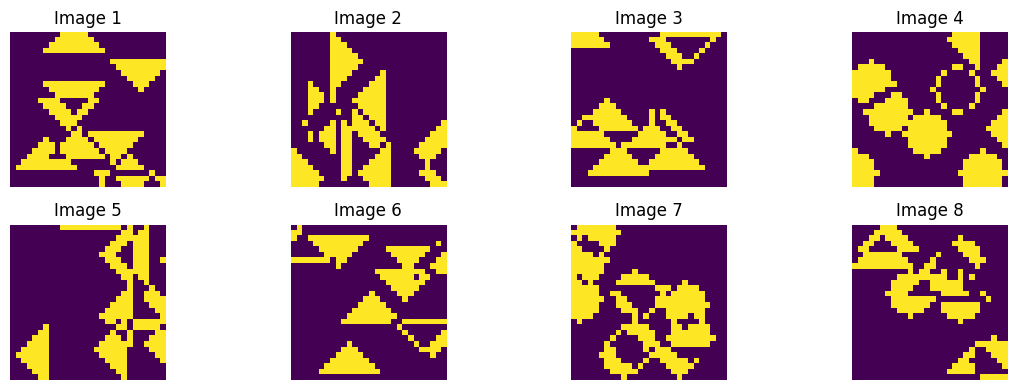

In [74]:
def eda():
  ds = GSNDataset("labels.csv", f"data")

  cls_ids = []
  cnt_list = []

  for i in range(10000):
    _, label = ds[i]
    cls_id = encode_cls_class(label.unsqueeze(0)).item()
    cls_ids.append(cls_id)
    cnt_list.append(label.tolist())

  cls_ids = np.array(cls_ids)
  cnt_arr = np.array(cnt_list)

  df_classes = {
      'class_id': cls_ids
  }
  fig1 = px.histogram(
      df_classes,
      x='class_id',
      nbins=NUM_CLASSES,
      title="Distribution of Classification Classes (0–134)"
  )
  fig1.show()

  shape_names = ["square","circle","triangle up","triangle right","triangle down","triangle left"]
  df_counts = {
      'count': cnt_arr.flatten(),
      'shape': np.repeat(shape_names, cnt_arr.shape[0])
  }
  fig2 = px.histogram(
      df_counts,
      x='shape',
      y='count',
      title="Counts Distribution per Shape Type"
  )
  fig2.show()

  images = []
  labels = []
  for i in range(8):
    img, label = ds[i]
    images.append(img)
    print(f"Label {i+1}: {label}")

  show_images(images)

eda()

## Multitask Network Class

In [75]:
class MultiTaskNet(nn.Module):
  def __init__(self):
    super(MultiTaskNet, self).__init__()

    self.backbone = nn.Sequential(
      nn.Conv2d(1, 8, 3, stride=1, padding=1), nn.ReLU(),
      nn.Conv2d(8, 16, 3, stride=1, padding=1), nn.ReLU(),
      nn.Conv2d(16, 32, 3, stride=1, padding=1), nn.ReLU(),
      nn.Conv2d(32, 64, 3, stride=1, padding=1), nn.ReLU(),
      nn.Flatten(start_dim=1),
      nn.Linear(64 * 28 * 28, 256), nn.ReLU()
    )

    # Classification head
    self.head_cls = nn.Sequential(
        nn.Dropout(0.65),
        nn.Linear(256, 135),
        nn.LogSoftmax(dim=1)
    )

    # Regression head
    self.head_cnt = nn.Sequential(
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(128, 6)
    )

  def forward(self, x):
    features = self.backbone(x)

    logits = self.head_cls(features)
    log_probs = F.log_softmax(logits, dim=1)

    counts = self.head_cnt(features)

    return log_probs, counts

### evaluate function

In [76]:
def evaluate(model, val_loader, device, lambda_cls, lambda_cnt):
  model.to(device)
  model.eval()

  l_cls = nn.NLLLoss()
  l_cnt = nn.SmoothL1Loss()

  metric_tracker = MetricTracker()

  with torch.no_grad():
      for images, labels in val_loader:
          images, labels = images.to(device), labels.to(device)
          class_targets = encode_cls_class(labels).to(device)
          log_probs, counts = model(images)

          loss = lambda_cls * l_cls(log_probs, class_targets) + lambda_cnt * l_cnt(counts, labels)

          metric_tracker.step(loss.item(), log_probs, class_targets, counts, labels)

  return metric_tracker.get_metrics()

### train_model function

In [77]:
def train_model(model, train_loader, val_loader, device, epochs=100, lr=1e-3, lambda_cls=1, lambda_cnt=0.3, target_acc=0.45, plots=True):
  model.to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr)
  l_cls = nn.NLLLoss()
  l_cnt = nn.SmoothL1Loss()

  train_losses, val_losses, val_top1_accs, val_rmses = [], [], [], []

  metric_tracker = MetricTracker()

  for epoch in range(epochs):
    model.train()

    metric_tracker.reset()

    for images, labels in train_loader:
      images, labels = images.to(device), labels.to(device)

      optimizer.zero_grad()
      log_probs, counts = model(images)

      class_targets = encode_cls_class(labels).to(device)
      loss = lambda_cls * l_cls(log_probs, class_targets) + lambda_cnt * l_cnt(counts, labels)
      loss.backward()
      optimizer.step()

      metric_tracker.step(loss.item(), log_probs, class_targets, counts, labels)

    train_metrics = metric_tracker.get_metrics()

    top1_acc = train_metrics['top1_acc']
    rmse = train_metrics['rmse']
    avg_loss = train_metrics['avg_loss']

    # validation data evaluating
    val_metrics = evaluate(model, val_loader, device, lambda_cls, lambda_cnt)

    val_top1_acc = val_metrics['top1_acc']
    val_rmse = val_metrics['rmse']
    val_avg_loss = val_metrics['avg_loss']

    train_losses.append(avg_loss)
    val_losses.append(val_avg_loss)
    val_top1_accs.append(val_top1_acc)
    val_rmses.append(val_rmse)

    # Prinint epoch metrics
    print(f"EPOCH {epoch+1}")
    data = [
        ["Train", avg_loss, top1_acc, rmse],
        ["Val", val_avg_loss, val_top1_acc, val_rmse]
    ]

    header = ["Metric", "Loss", "top1 acc", "rmse"]
    print(f"{header[0]:<10} {header[1]:>10} {header[2]:>10} {header[3]:>10}")
    for row in data:
      print(f"{row[0]:<10} {row[1]:>10.2f} {row[2]:>10.2f}% {row[3]:>10.2f}")

    # Early stopping
    if val_top1_acc >= target_acc * 100:
      epochs = epoch + 1
      print(f"Early stopping: reached {val_top1_acc:.2f}% val accuracy at epoch {epoch + 1}")
      break

  if plots:
    df = pd.DataFrame({
        "Epoch": list(range(1, epochs + 1)),
        "Val Top-1 Accuracy": val_top1_accs,
        "Val RMSE": val_rmses,
        "Train Loss": train_losses,
        "Val Loss": val_losses
    })

    fig1 = px.line(df, x="Epoch", y=["Train Loss", "Val Loss"], title="Train and Val Losses Over Epochs")
    fig1.show()

    if lambda_cls:
      fig2 = px.line(df, x="Epoch", y="Val Top-1 Accuracy", title="Top-1 Val Accuracy Over Epochs")
      fig2.show()

      plot_confusion_heatmap(val_metrics['conf_matrix'])

    if lambda_cnt:
      fig3 = px.line(df, x="Epoch", y="Val RMSE", title="Val RMSE Over Epochs")
      fig3.show()

## Run

In [78]:
g = torch.Generator()
g.manual_seed(1)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

augment = RandomAugmentation(p_flip=0.3, p_vflip=0.3, p_noise=0.1, p_erase=0.2, noise_std=0.1)
train_dataset = GSNDataset("labels.csv", f"data", last_sample=8999, transform=transform, augment=augment)
val_dataset = GSNDataset("labels.csv", f"data", first_sample=9000, transform=val_transform)

train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    generator=g,
    num_workers=0
)

val_loader = DataLoader(
    val_dataset,
    batch_size=1000,
    shuffle=True,
    generator=g,
    num_workers=0
)

In [79]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


### Classification only

In [80]:
%%time
model_cls = MultiTaskNet().to(device)
train_model(model_cls, train_loader, val_loader, device, epochs=100, lambda_cls=1, lambda_cnt=0)

print("Printing metrics of the model on validation set")
print_metrics(evaluate(model_cls, val_loader, device, lambda_cls=1, lambda_cnt=0))

EPOCH 1
Metric           Loss   top1 acc       rmse
Train            4.78       0.93%       3.10
Val              4.68       1.20%       3.10
EPOCH 2
Metric           Loss   top1 acc       rmse
Train            4.61       1.39%       3.12
Val              4.23       3.40%       3.08
EPOCH 3
Metric           Loss   top1 acc       rmse
Train            4.16       2.88%       3.09
Val              3.72       6.60%       3.05
EPOCH 4
Metric           Loss   top1 acc       rmse
Train            3.75       5.36%       3.10
Val              3.25      10.90%       3.08
EPOCH 5
Metric           Loss   top1 acc       rmse
Train            3.40       7.92%       3.10
Val              2.97      11.70%       3.07
EPOCH 6
Metric           Loss   top1 acc       rmse
Train            3.11      10.90%       3.10
Val              2.51      22.50%       3.09
EPOCH 7
Metric           Loss   top1 acc       rmse
Train            2.82      14.49%       3.10
Val              2.23      25.40%       3.07
EPOCH 

Printing metrics of the model on validation set

==================== METRICS SUMMARY ====================

Loss               : 1.3432
Top-1 Accuracy     : 46.0000
Macro F1-score     : 0.3137

Per-pair Accuracy (15 classes):
  Pair (square, circle): 57.1429
  Pair (square, up): 44.2857
  Pair (square, right): 47.6190
  Pair (square, down): 48.4375
  Pair (square, left): 42.0290
  Pair (circle, up): 45.3333
  Pair (circle, right): 45.0704
  Pair (circle, down): 47.5410
  Pair (circle, left): 53.1250
  Pair (up, right): 44.6154
  Pair (up, down): 47.7612
  Pair (up, left): 43.0769
  Pair (right, down): 41.9355
  Pair (right, left): 46.9697
  Pair (down, left): 37.3333

RMSE per class:
  Class square: 3.0108
  Class circle: 3.1260
  Class up: 3.3232
  Class right: 3.0703
  Class down: 3.0530
  Class left: 3.1011
RMSE overall       : 3.1157

MAE per class:
  Class square: 1.7913
  Class circle: 1.8253
  Class up: 1.9383
  Class right: 1.8740
  Class down: 1.8273
  Class left: 1.7691
MAE o

### Regression only

In [81]:
%%time
model_cnt = MultiTaskNet().to(device)
train_model(model_cnt, train_loader, val_loader, device, epochs=100, lambda_cls=0, lambda_cnt=1)

print("Printing metrics of the model on validation set")
print_metrics(evaluate(model_cnt, val_loader, device, lambda_cls=0, lambda_cnt=1))

EPOCH 1
Metric           Loss   top1 acc       rmse
Train            1.06       0.80%       2.28
Val              1.13       1.20%       2.15
EPOCH 2
Metric           Loss   top1 acc       rmse
Train            0.63       0.82%       1.60
Val              0.61       0.70%       1.48
EPOCH 3
Metric           Loss   top1 acc       rmse
Train            0.45       0.96%       1.19
Val              0.44       0.40%       1.14
EPOCH 4
Metric           Loss   top1 acc       rmse
Train            0.40       0.83%       1.12
Val              0.37       0.10%       1.02
EPOCH 5
Metric           Loss   top1 acc       rmse
Train            0.37       0.60%       1.07
Val              0.29       0.50%       0.89
EPOCH 6
Metric           Loss   top1 acc       rmse
Train            0.36       0.76%       1.05
Val              0.27       0.20%       0.85
EPOCH 7
Metric           Loss   top1 acc       rmse
Train            0.35       0.70%       1.04
Val              0.24       0.20%       0.79
EPOCH 

Printing metrics of the model on validation set

==================== METRICS SUMMARY ====================

Loss               : 0.1399
Top-1 Accuracy     : 0.6000
Macro F1-score     : 0.0024

Per-pair Accuracy (15 classes):
  Pair (square, circle): 0.0000
  Pair (square, up): 5.7143
  Pair (square, right): 0.0000
  Pair (square, down): 0.0000
  Pair (square, left): 0.0000
  Pair (circle, up): 0.0000
  Pair (circle, right): 0.0000
  Pair (circle, down): 0.0000
  Pair (circle, left): 0.0000
  Pair (up, right): 0.0000
  Pair (up, down): 2.9851
  Pair (up, left): 0.0000
  Pair (right, down): 0.0000
  Pair (right, left): 0.0000
  Pair (down, left): 0.0000

RMSE per class:
  Class square: 0.4714
  Class circle: 0.4651
  Class up: 0.5872
  Class right: 0.6195
  Class down: 0.6169
  Class left: 0.6140
RMSE overall       : 0.5664

MAE per class:
  Class square: 0.3035
  Class circle: 0.2621
  Class up: 0.3288
  Class right: 0.3442
  Class down: 0.3402
  Class left: 0.3792
MAE overall        : 

### Multitask (classification + regression)

In [82]:
%%time
model_multi = MultiTaskNet().to(device)
train_model(model_multi, train_loader, val_loader, device, epochs=100, lambda_cls=1, lambda_cnt=0.3)

print("Printing metrics of the model on validation set")
print_metrics(evaluate(model_multi, val_loader, device, lambda_cls=1, lambda_cnt=0.3))

EPOCH 1
Metric           Loss   top1 acc       rmse
Train            5.07       1.33%       2.25
Val              4.98       2.20%       2.39
EPOCH 2
Metric           Loss   top1 acc       rmse
Train            4.07       6.61%       1.30
Val              2.85      18.90%       1.11
EPOCH 3
Metric           Loss   top1 acc       rmse
Train            2.95      15.28%       1.19
Val              2.15      26.60%       0.90
EPOCH 4
Metric           Loss   top1 acc       rmse
Train            2.52      19.46%       1.12
Val              1.91      29.90%       0.82
EPOCH 5
Metric           Loss   top1 acc       rmse
Train            2.31      23.03%       1.09
Val              1.82      34.60%       0.84
EPOCH 6
Metric           Loss   top1 acc       rmse
Train            2.21      25.24%       1.07
Val              1.74      32.50%       0.79
EPOCH 7
Metric           Loss   top1 acc       rmse
Train            2.13      25.66%       1.06
Val              1.71      35.40%       0.79
EPOCH 

Printing metrics of the model on validation set

==================== METRICS SUMMARY ====================

Loss               : 1.3110
Top-1 Accuracy     : 46.7000
Macro F1-score     : 0.3277

Per-pair Accuracy (15 classes):
  Pair (square, circle): 58.7302
  Pair (square, up): 44.2857
  Pair (square, right): 50.7937
  Pair (square, down): 53.1250
  Pair (square, left): 62.3188
  Pair (circle, up): 41.3333
  Pair (circle, right): 50.7042
  Pair (circle, down): 42.6230
  Pair (circle, left): 46.8750
  Pair (up, right): 47.6923
  Pair (up, down): 52.2388
  Pair (up, left): 35.3846
  Pair (right, down): 53.2258
  Pair (right, left): 30.3030
  Pair (down, left): 33.3333

RMSE per class:
  Class square: 0.5639
  Class circle: 0.5107
  Class up: 0.6012
  Class right: 0.6627
  Class down: 0.6252
  Class left: 0.6848
RMSE overall       : 0.6109

MAE per class:
  Class square: 0.3576
  Class circle: 0.2896
  Class up: 0.3310
  Class right: 0.3793
  Class down: 0.3562
  Class left: 0.3823
MAE o